In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [20]:
root = Path(Path.cwd()).resolve().parents[1]  # go up one level from src/
csv_path = root / "model" / "benchmark" / "benchmark_results.csv"

df = pd.read_csv(csv_path)

df_filtered = df[df['model_name'] == "ROUND SUMMARY"]

DEVICE = df_filtered['device'].iloc[0]

df_filtered

,model_name,device,round,run,elapsed_time_sec,round_avg_sec,round_std_sec,input_length,generated_length,tokens_per_sec,seed,temperature,top_p,top_k,response_preview
5,ROUND SUMMARY,distilgpt2,cpu,1.0,NaN,1.3322,0.2995,NaN,NaN,767.6784,NaN,NaN,NaN,NaN,NaN
11,ROUND SUMMARY,distilgpt2,cpu,2.0,NaN,1.3200,0.5035,NaN,NaN,764.8465,NaN,NaN,NaN,NaN,NaN
17,ROUND SUMMARY,distilgpt2,cpu,3.0,NaN,0.6955,0.2593,NaN,NaN,832.4710,NaN,NaN,NaN,NaN,NaN
23,ROUND SUMMARY,distilgpt2,cpu,4.0,NaN,1.0485,0.3117,NaN,NaN,694.1929,NaN,NaN,NaN,NaN,NaN
29,ROUND SUMMARY,distilgpt2,cpu,5.0,NaN,1.1347,0.5062,NaN,NaN,786.9627,NaN,NaN,NaN,NaN,NaN
35,ROUND SUMMARY,distilgpt2,cpu,6.0,NaN,1.1525,0.5067,NaN,NaN,821.9433,NaN,NaN,NaN,NaN,NaN
41,ROUND SUMMARY,distilgpt2,cpu,7.0,NaN,0.7154,0.3424,NaN,NaN,826.8445,NaN,NaN,NaN,NaN,NaN
47,ROUND SUMMARY,distilgpt2,cpu,8.0,NaN,0.9893,0.5151,NaN,NaN,769.0515,NaN,NaN,NaN,NaN,NaN
53,ROUND SUMMARY,distilgpt2,cpu,9.0,NaN,1.4009,0.2800,NaN,NaN,756.1295,NaN,NaN,NaN,NaN,NaN
59,ROUND SUMMARY,distilgpt2,cpu,10.0,NaN,1.0307,0.5903,NaN,NaN,875.4122,NaN,NaN,NaN,NaN,NaN


In [21]:
df_filtered = df_filtered.drop(["model_name", "device", "round", "elapsed_time_sec", "input_length", "generated_length", "seed", "temperature", "top_p", "top_k", "response_preview"], axis=1)

df_tps = df_filtered.drop(["run", "round_avg_sec", "round_std_sec"], axis=1)
df_sec = df_filtered.drop(["run", "tokens_per_sec"], axis=1)

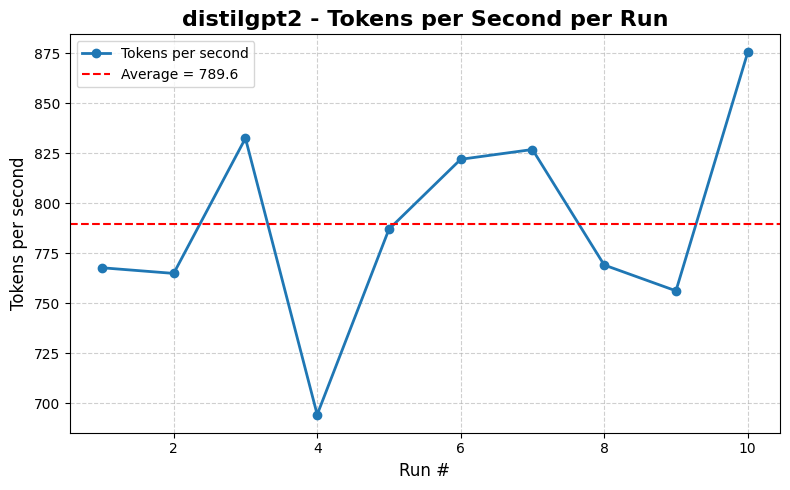

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.plot(
    df_filtered["run"], 
    df_filtered["tokens_per_sec"], 
    marker='o', 
    linestyle='-', 
    linewidth=2,
    markersize=6,
    label="Tokens per second"
)

plt.title("distilgpt2 - Tokens per Second per Run", fontsize=16, fontweight='bold')
plt.xlabel("Run #", fontsize=12)
plt.ylabel("Tokens per second", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Average line
avg = df_filtered["tokens_per_sec"].mean()
plt.axhline(avg, color='red', linestyle='--', linewidth=1.5, label=f'Average = {avg:.1f}')
plt.legend()

plt.show()

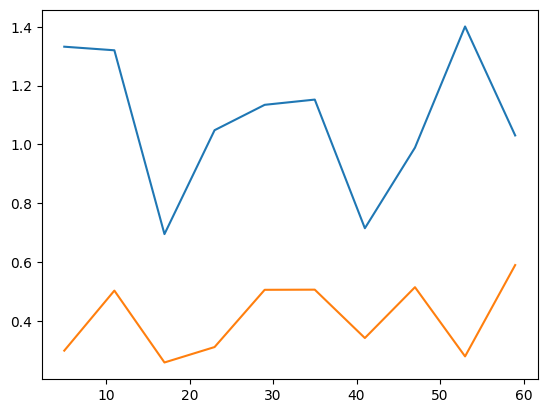

In [23]:
plt.plot(df_sec)